In [1]:
import geopandas as gpd
from shapely import LineString, Polygon, Point
import shapely
from shapely import ops
import matplotlib.pyplot as plt
from CPP_Planner import CPP_Algorithms, CPP_Planner_Kit
from shapely import affinity

In [2]:
all_land = gpd.read_file('test_Load_Shp/shp_file/村1地_全区.shp')
all_land.geometry = all_land.geometry.apply(shapely.set_precision, grid_size=0.05)
all_land

,NAME,LAYER,周长,闭合面积,geometry
0,地2,Unknown Area Type,315.38 m,0.001833 sq km,"POLYGON ((440417.600 4397401.450, 440401.850 4..."
1,地3,Unknown Area Type,182.65 m,0.001528 sq km,"POLYGON ((440478.950 4397335.400, 440484.500 4..."
2,地4,Unknown Area Type,247.41 m,0.00125 sq km,"POLYGON ((440472.250 4397608.050, 440469.000 4..."
3,地5,Unknown Area Type,143.98 m,0.000743 sq km,"POLYGON ((440450.050 4397795.250, 440451.850 4..."
4,地6,Unknown Area Type,120.25 m,0.000631 sq km,"POLYGON ((440352.800 4397768.750, 440351.250 4..."
5,地7,Unknown Area Type,147.18 m,0.001222 sq km,"POLYGON ((440315.750 4397785.800, 440309.100 4..."
6,地1_区,Unknown Area Type,442.09 m,0.004246 sq km,"POLYGON ((440410.850 4397414.750, 440398.850 4..."


<Axes: >

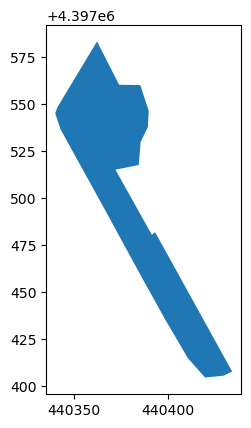

In [3]:
single_land = CPP_Planner_Kit.get_single_shp(all_land, ind=6)
single_land.plot()

split_polygon_by_largest_area： 开始进行田块分割，当前误差范围 tolerance = 0.03
Num of convex_hull:  12
Num of Polygon lines:  20
Not on Convex:  11
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  3
Extending lines...
当前分割多边形个数:  3
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  3
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Num of convex_hull:  7
Num of Polygon lines:  9
Not on Convex:  4
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
Extending lines...
当前分割多边形个数:  2
田块分割结束...


/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


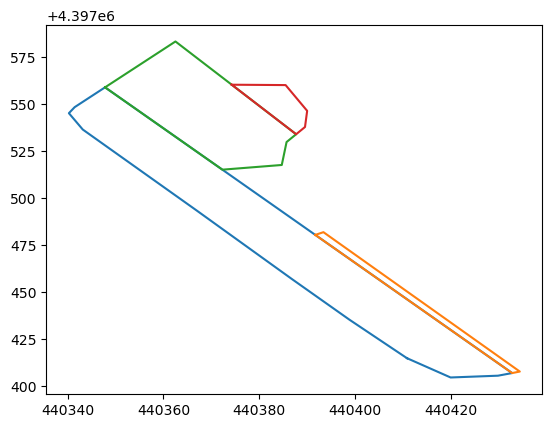

In [4]:
split_polygon = CPP_Planner_Kit.split_polygon_by_largest_area(single_land.geometry.iloc[0])
fig, ax = plt.subplots()
for polygon in split_polygon:
    ax.plot(*polygon.exterior.xy)

In [5]:
single_polygon = split_polygon[2]
# 将其旋转到水平
single_polygon_angle = CPP_Planner_Kit.get_land_MABR_angle(single_polygon)
single_polygon = affinity.rotate(single_polygon, -single_polygon_angle, origin='centroid')
single_polygon = shapely.set_precision(single_polygon, 0.05)
print(single_polygon)

当前田块角度： -62.93840400283977
POLYGON ((440333 4397557.95, 440358.8 4397557.95, 440388.4 4397557.95, 440391.2 4397554.3, 440401.6 4397547.85, 440398.2 4397535.65, 440348.05 4397533.75, 440333 4397557.95))


/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/constructive.py:1000: RuntimeWarning: invalid value encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/constructive.py:1000: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


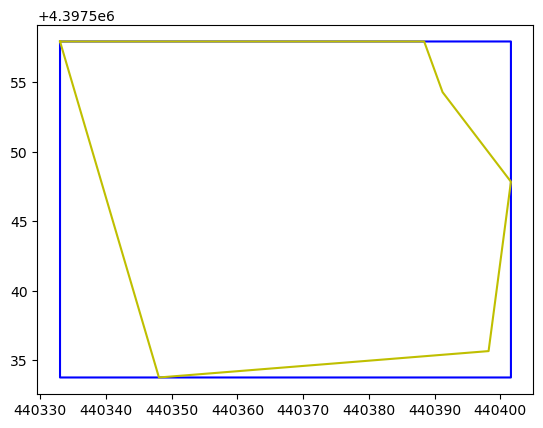

In [6]:
# 显示最小旋转外接矩形和多边形本身
mabr = single_polygon.minimum_rotated_rectangle
fig, ax = plt.subplots()
x, y = mabr.exterior.xy
ax.plot(x, y, 'b')
x, y = single_polygon.exterior.xy
ax.plot(x, y, 'y')

POLYGON ((440333 4397557.95, 440333 4397533.75, 440401.6 4397533.75, 440401.6 4397557.95, 440333 4397557.95))


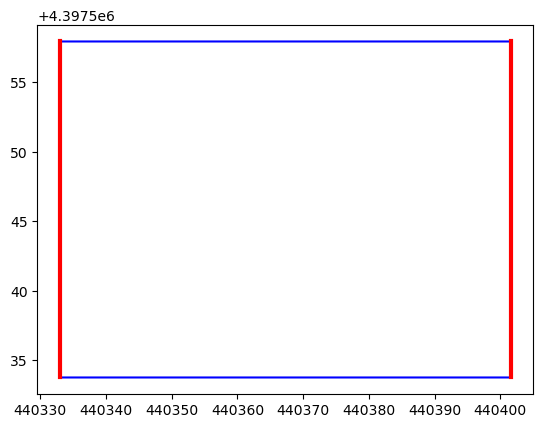

In [7]:
mabr = single_polygon.minimum_rotated_rectangle
print(mabr)
vertices = list(mabr.exterior.coords)
short_edges = [(vertices[0], vertices[1]), (vertices[2], vertices[3])]
long_edges = [(vertices[1], vertices[2]), (vertices[3], vertices[4])]
for i in range(len(long_edges)):
    long_edges[i] = LineString(long_edges[i])

for i in range(len(short_edges)):
    short_edges[i] = LineString(short_edges[i])
fig, ax = plt.subplots()
ax.plot(*mabr.exterior.xy, 'b')
for edge in short_edges:
    x, y = edge.xy
    ax.plot(x, y, 'r', linewidth=3)

In [8]:
# 获取 MABR 的高度
mabr_height = short_edges[0].length
print(mabr_height)
# 找到这个高度的上点和下点的坐标
up = vertices[2][1]
down = vertices[3][1]
print(f"up: {up}", f" down: {down}")
print(f"up - down: {up - down}")
# 找到上点的点集合和下点的点集合
up_points = []
down_points = []
x, y = single_polygon.exterior.xy
for i in range(len(x)):
    print(y[i])
    # if y[i] >= up:
    if abs(y[i] - up) < 0.1:
        up_points.append(i)
    # if y[i] <= down:
    if abs(y[i] - down) < 0.1:
        down_points.append(i)
print("up_points: ", up_points)
print("down_points: ", down_points)
for i in range(len(up_points)):
    up_points[i] = [x[up_points[i]], y[up_points[i]]]
for i in range(len(down_points)):
    down_points[i] = [x[down_points[i]], y[down_points[i]]]
print("up_points: ", up_points)
print("down_points: ", down_points)

24.19997558556497
up: 4397533.75  down: 4397557.950036621
up - down: -24.20003662072122
4397557.95
4397557.95
4397557.95
4397554.3
4397547.850000001
4397535.65
4397533.75
4397557.95
up_points:  [6]
down_points:  [0, 1, 2, 7]
up_points:  [[440348.05000000005, 4397533.75]]
down_points:  [[440333.0, 4397557.95], [440358.80000000005, 4397557.95], [440388.4, 4397557.95], [440333.0, 4397557.95]]


long edge up:  LINESTRING (440333 4397533.75, 440401.599987793 4397533.75)
long edge down:  LINESTRING (440401.599987793 4397557.950036621, 440333 4397557.949975586)


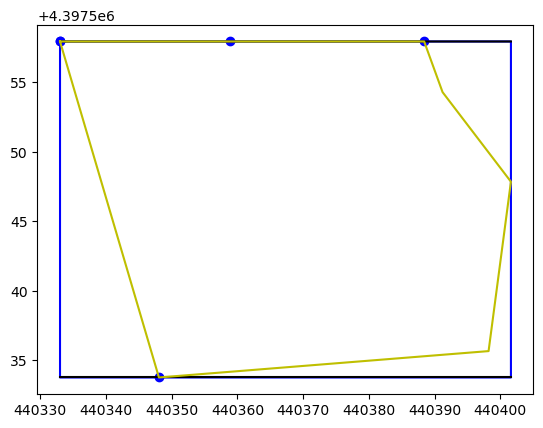

In [9]:
# 显示出来看看
long_edge_up = long_edges[0]
long_edge_down = long_edges[1]
print("long edge up: ", long_edge_up)
print("long edge down: ", long_edge_down)
fig, ax = plt.subplots()
ax.plot(*mabr.exterior.xy, 'b')
ax.plot(*long_edge_up.xy, 'black')
ax.plot(*long_edge_down.xy, 'black')
ax.plot(*single_polygon.exterior.xy, 'y')

x_coords = [point[0] for point in up_points]
y_coords = [point[1] for point in up_points]
ax.scatter(x_coords, y_coords, c='blue')
x_coords = [point[0] for point in down_points]
y_coords = [point[1] for point in down_points]
ax.scatter(x_coords, y_coords, c='blue')

In [10]:
bound = single_polygon.boundary
print(type(bound))
print(bound)

<class 'shapely.geometry.linestring.LineString'>
LINESTRING (440333 4397557.95, 440358.8 4397557.95, 440388.4 4397557.95, 440391.2 4397554.3, 440401.6 4397547.85, 440398.2 4397535.65, 440348.05 4397533.75, 440333 4397557.95)


In [11]:
# 现在已经找到了在 MABR 上边界和下边界的四个点，现在需要找到“左右两侧的边”，找出对应的边
print(up_points)
print(down_points)
# try
left_begin_point = down_points[-1]
left_end_point = up_points[0]
right_begin_point = up_points[0]
right_end_point = down_points[-1]
print([left_begin_point, left_end_point])
print([right_begin_point, right_end_point])

[[440348.05000000005, 4397533.75]]
[[440333.0, 4397557.95], [440358.80000000005, 4397557.95], [440388.4, 4397557.95], [440333.0, 4397557.95]]
[[440333.0, 4397557.95], [440348.05000000005, 4397533.75]]
[[440348.05000000005, 4397533.75], [440333.0, 4397557.95]]


In [12]:
# 尝试将 LineString 用点分开，left_begin_point 是一个保存了 xy 坐标的列表，因此需要手动设置成 Point 格式
split_line = ops.split(bound, Point(left_begin_point[0], left_begin_point[1]))
print(split_line)
result = []
for geom in split_line.geoms:
    result.append(ops.split(geom, Point(left_end_point[0], left_end_point[1])))
print(result[0])
split_line = result[0]

GEOMETRYCOLLECTION (LINESTRING (440333 4397557.95, 440358.80000000005 4397557.95, 440388.4 4397557.95, 440391.2 4397554.3, 440401.60000000003 4397547.850000001, 440398.2 4397535.65, 440348.05000000005 4397533.75, 440333 4397557.95))
GEOMETRYCOLLECTION (LINESTRING (440333 4397557.95, 440358.80000000005 4397557.95, 440388.4 4397557.95, 440391.2 4397554.3, 440401.60000000003 4397547.850000001, 440398.2 4397535.65, 440348.05000000005 4397533.75), LINESTRING (440348.05000000005 4397533.75, 440333 4397557.95))


2


IndexError: list index out of range

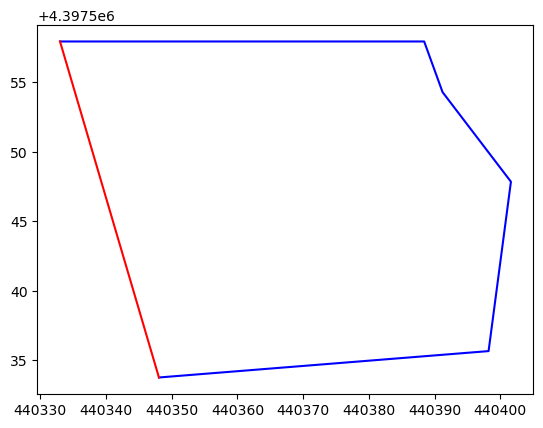

In [13]:
fig, ax = plt.subplots()
color = ['r', 'g', 'b', 'w', 'black', 'pink']
c = 0
geoms = []
for geom in split_line.geoms:
    geoms.append(geom)
print(len(geoms))
ax.plot(*geoms[0].xy, 'b')
ax.plot(*geoms[1].xy, 'r')
ax.plot(*geoms[2].xy, 'g')

In [ ]:
print(split_line)

In [ ]:

import numpy as np
def scanline_algorithm_single_no_turn(land: gpd.GeoDataFrame, step_size: float, along_long_edge=False, headland = 'none', headland_width = 0) \
        -> gpd.GeoDataFrame:
    """
    *** 这是上面的算法的改进，取消了转向策略，但是需要将其作为一个单独的问题点来解决
    将单个地块中的路径按照 “扫描线” 的方法做全覆盖路径规划
    1. 扫描线方法的基本思想是将扫描线从区域的一个边缘沿着特定方向移动，直到达到另一个边缘。在移动的过程中，扫描线将覆盖区域内的部分区域。
       通过在扫描线移动的过程中进行适当的路径选择，可以找到覆盖整个区域的路径
    2. 在算法中会将整个地块旋转到长边“水平”的角度，旋转的点是 polygon.centroid，在规划完路径后，将整个路径按照刚才的 polygon.centroid
       点反向旋转为原来的位置

    * 整个算法需要保证 polygon 在旋转后，能够镜像返回

    :param land: 当前地块，默认是 geopandas.GeoDataFrame，在进行路径规划的时候，直接使用其 Polygon 属性即可
    :param step_size: 扫描线一次移动的距离，对应到实际情况就是一次耕作的宽度
    :param along_long_edge: 是否按照多边形的“长边”为路径进行路径规划，默认是打开的
    :param headland: 是否生成地头，默认不生成，可以输入字符串：both（两侧），none（不生成），left（左侧），right（右侧）
    :param headland_width: 如果生成地头，会按照设置地头的宽度生成
    :return: 返回当前地块的扫描线路径，扫描线路径仅包含在地块内部
    """
    if len(land) > 1:
        print("scanline_algorithm_single: 地块超过了一个，当前地块大小：", len(land))
        return

    # 将 land 中的 polygon 提取出来，保证一次只有一个地块，随即获取相关的信息
    land_polygon = land.iloc[0].geometry
    land_centroid = land_polygon.centroid  # 当前地块的原始坐标位置，保存的中心位置，方便后期反向旋转回退
    if not along_long_edge:
        land_angle = 0
    else:
        land_angle = CPP_Planner_Kit.get_land_MABR_angle(land_polygon)  # 获取角度

    # 置于水平，在后面的路径规划算法中，优先使用该旋转的地块来进行路径规划
    rotated_polygon = affinity.rotate(land_polygon, -land_angle, origin=land_centroid)
    if along_long_edge:
        print("根据田块长边开始路径规划...")
    else:
        print("水平方向开始路径规划")

    # 计算多边形的边界框
    min_x, min_y, max_x, max_y = rotated_polygon.bounds

    # 初始化路径线列表
    path_lines = []

    # 迭代扫描线
    for y in np.arange(min_y, max_y + step_size, step_size):
        row_points = []
        for i in range(len(rotated_polygon.exterior.coords) - 1):
            edge = rotated_polygon.exterior.coords[i]
            next_edge = rotated_polygon.exterior.coords[i + 1]
            # print(edge)
            # print(next_edge)
            if (edge[1] <= y and next_edge[1] > y) or (next_edge[1] <= y and edge[1] > y):
                x = edge[0] + (next_edge[0] - edge[0]) * (y - edge[1]) / (next_edge[1] - edge[1])
                row_points.append([x, y])

        # 创建扫描线的 LineString 对象
        if len(row_points) > 1:
            # 处理地头，首先找到 x 最小和最大的点的索引，代表当前扫描线的边界
            min_x_index = min(range(len(row_points)), key=lambda i: row_points[i][0])
            max_x_index = max(range(len(row_points)), key=lambda i: row_points[i][0])
            # print("min x index: ", min_x_index)
            # print("max x index: ", max_x_index)
            # 生成地头
            if headland == 'left' or headland == 'both':
                row_points[min_x_index][0] = row_points[min_x_index][0] + headland_width
            if headland == 'right' or headland == 'both':
                row_points[max_x_index][0] = row_points[max_x_index][0] - headland_width
            path_line = LineString(row_points)
            # 尝试：仅保留长度在1m以上的耕作路径?
            if path_line.length > 5:
                path_line = affinity.rotate(path_line, land_angle, origin=land_centroid)
                path_lines.append(path_line)

    # 创建 GeoDataFrame 对象
    path_gdf = gpd.GeoDataFrame(geometry=path_lines, crs=land.crs)

    print("这次规划完成！")
    return path_gdf

single_polygon_regen = gpd.GeoDataFrame(geometry=[single_polygon], crs = single_land.crs)
scan_result = scanline_algorithm_single_no_turn(single_polygon_regen, 1.4, along_long_edge=True, headland='both', headland_width=6)

In [ ]:
# 尝试更改扫描线算法
# single_polygon_regen = gpd.GeoDataFrame(geometry=[single_polygon], crs = single_land.crs)
# scan_result = scanline_algorithm_single_no_turn(single_polygon_regen, 1.4, along_long_edge=True, headland='both', headland_width=6)
# scan_result = scanline_algorithm_single_no_turn(single_polygon_regen, 1.4, along_long_edge=True)

In [ ]:
fig, ax = plt.subplots()
ax.plot(*single_polygon.exterior.xy, c='b')
# ax.plot(*single_land.geometry.iloc[0].exterior.xy)
scan_result.plot(ax=ax, color='y')

In [ ]:
# 如果再做个 buffer？
scan_result_buffered_1 = scan_result.buffer(1.7, single_sided=True)
scan_result_buffered_2 = scan_result.buffer(-1.7, single_sided=True)
fig, ax = plt.subplots()
ax.plot(*single_polygon.exterior.xy, c='b')
scan_result_buffered_1.plot(ax=ax, color='y')
scan_result_buffered_2.plot(ax=ax, color='y')
# 这样就可以计算差集来获取地头的大小！

In [ ]:
# 将两个缓冲区并集
scan_result_buffered_union_1 = scan_result_buffered_1.unary_union
scan_result_buffered_union_2 = scan_result_buffered_2.unary_union
scan_result_buffered_union = scan_result_buffered_union_1.union(scan_result_buffered_union_2)
fig, ax = plt.subplots()
ax.plot(*single_polygon.exterior.xy, c='b')
ax.plot(*scan_result_buffered_union.exterior.xy, color='y')

In [ ]:
# 获取 singe_polygon 和 scan_result_buffered_union 的差集
scan_result_buffered_union_polygon = Polygon(scan_result_buffered_union.exterior)
single_polygon_difference = single_polygon.difference(scan_result_buffered_union_polygon)
print(type(single_polygon_difference))
print(single_polygon_difference)
fig, ax = plt.subplots()
for t_polygon in single_polygon_difference.geoms:
    ax.plot(*t_polygon.exterior.xy, 'r')
    print("area: ", t_polygon.area)
    # print(t_polygon)

In [18]:
single_polygon_regen = gpd.GeoDataFrame(geometry=[single_polygon], crs = single_land.crs)
path, headland = CPP_Algorithms.scanline_algorithm_single_with_headland(single_polygon_regen, 1.4, headland='both', head_land_width=6)

当前田块角度： -179.99994902248577
根据田块长边开始路径规划...
生成地头区域...
这次规划完成！


/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/constructive.py:1000: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/constructive.py:1000: RuntimeWarning: invalid value encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib

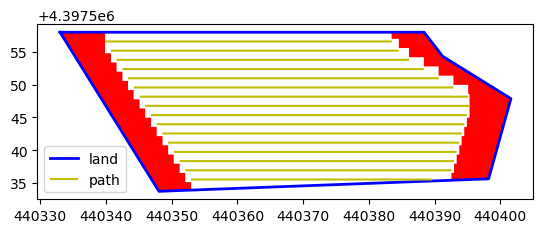

In [22]:
fig, ax = plt.subplots()
ax.plot(*single_polygon.exterior.xy, 'b', linewidth=2)
path.plot(ax=ax, color='y')
headland.plot(ax=ax, color='r')
# 显示 legend
ax.legend(['land', 'path', 'headland'])